In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

sns.set(style="whitegrid")

In [2]:
# step2: Load data
df = pd.read_csv("ad_click_dataset.csv")
print("First 5 rows:")
print(df.head())

First 5 rows:
     id full_name   age      gender device_type ad_position browsing_history  \
0   670   User670  22.0         NaN     Desktop         Top         Shopping   
1  3044  User3044   NaN        Male     Desktop         Top              NaN   
2  5912  User5912  41.0  Non-Binary         NaN        Side        Education   
3  5418  User5418  34.0        Male         NaN         NaN    Entertainment   
4  9452  User9452  39.0  Non-Binary         NaN         NaN     Social Media   

  time_of_day  click  
0   Afternoon      1  
1         NaN      1  
2       Night      1  
3     Evening      1  
4     Morning      0  


In [3]:
# step3: EDA - Exploratory Data Analysi
print("\nDataset shape:", df.shape)


Dataset shape: (10000, 9)


In [4]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.3+ KB
None


In [5]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
                 id          age         click
count  10000.000000  5234.000000  10000.000000
mean    5060.211400    40.197363      0.650000
std     2861.758265    13.126420      0.476993
min        5.000000    18.000000      0.000000
25%     2529.000000    29.000000      0.000000
50%     5218.000000    39.500000      1.000000
75%     7466.000000    52.000000      1.000000
max    10000.000000    64.000000      1.000000


In [6]:
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64


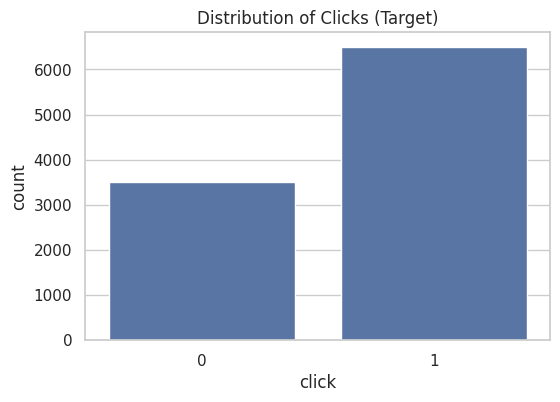

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='click', data=df)
plt.title("Distribution of Clicks (Target)")
plt.show()

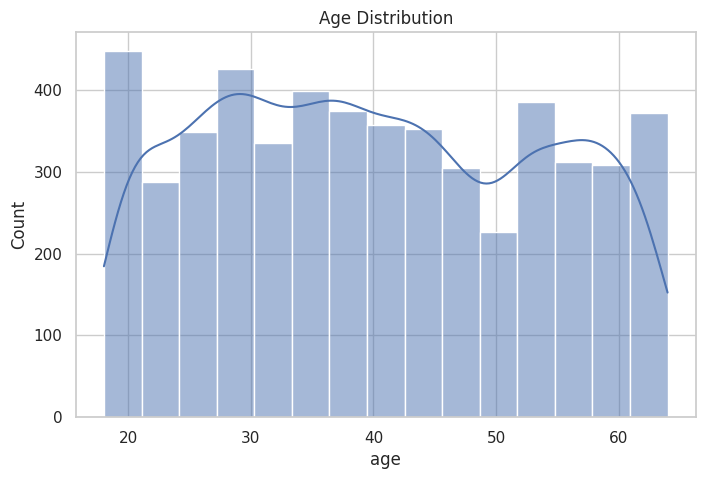

In [8]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'].dropna(), bins=15, kde=True)
plt.title("Age Distribution")
plt.show()

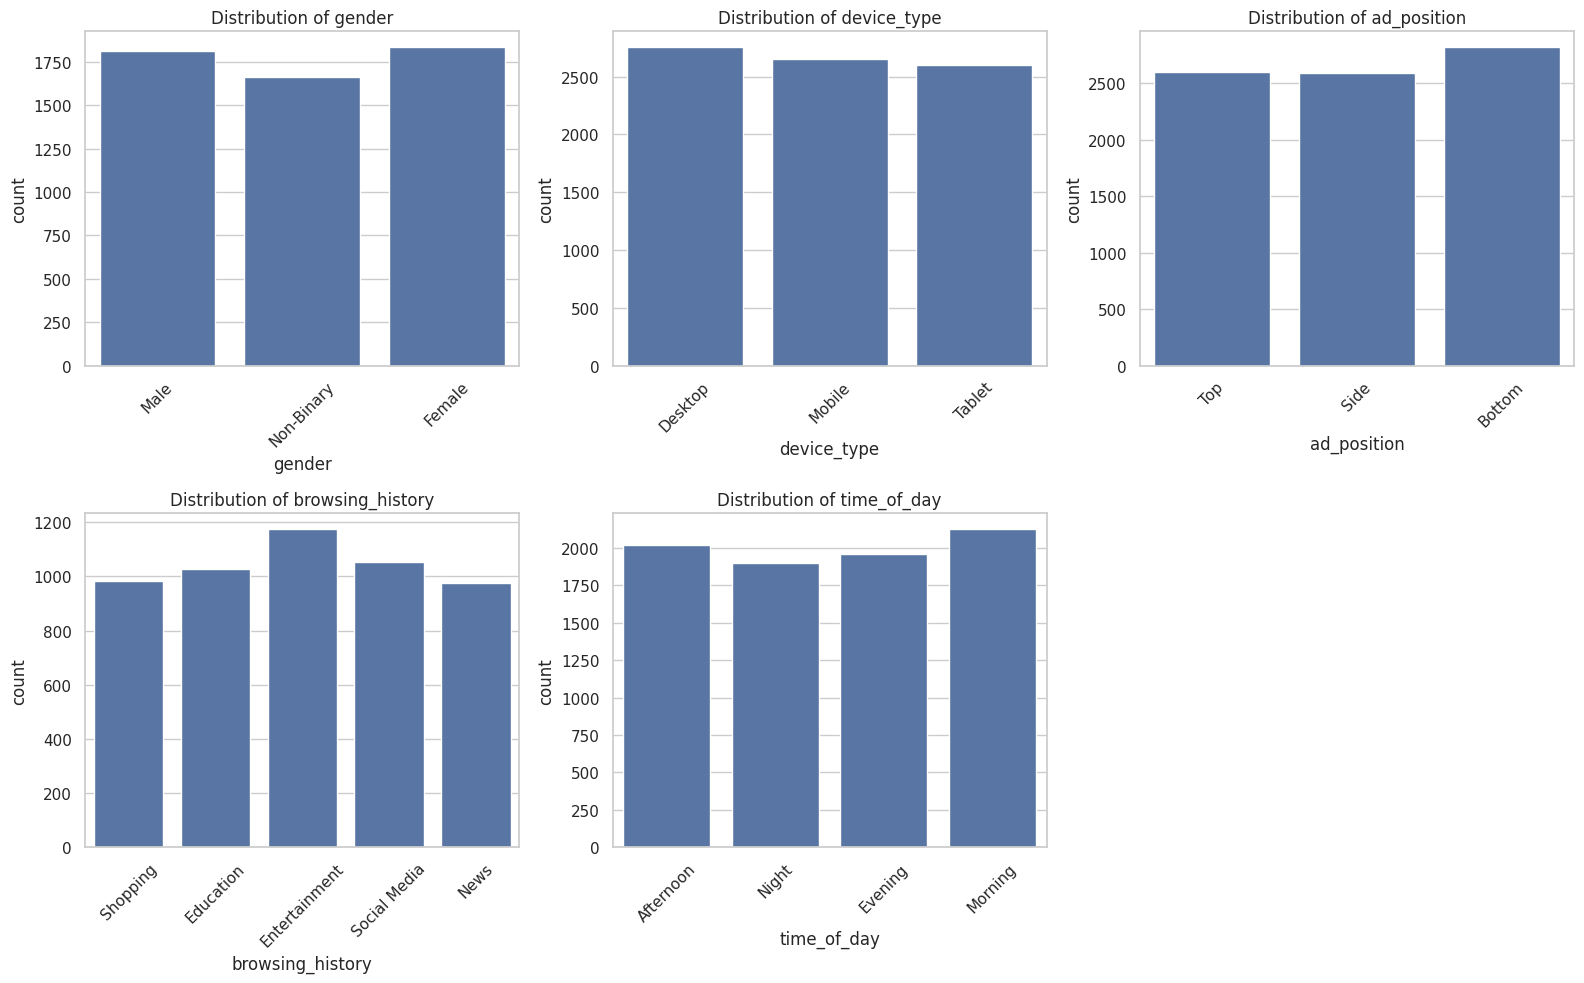

In [9]:
# Categorical features distribution
categorical_cols = ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']
plt.figure(figsize=(16,10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2,3,i)
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

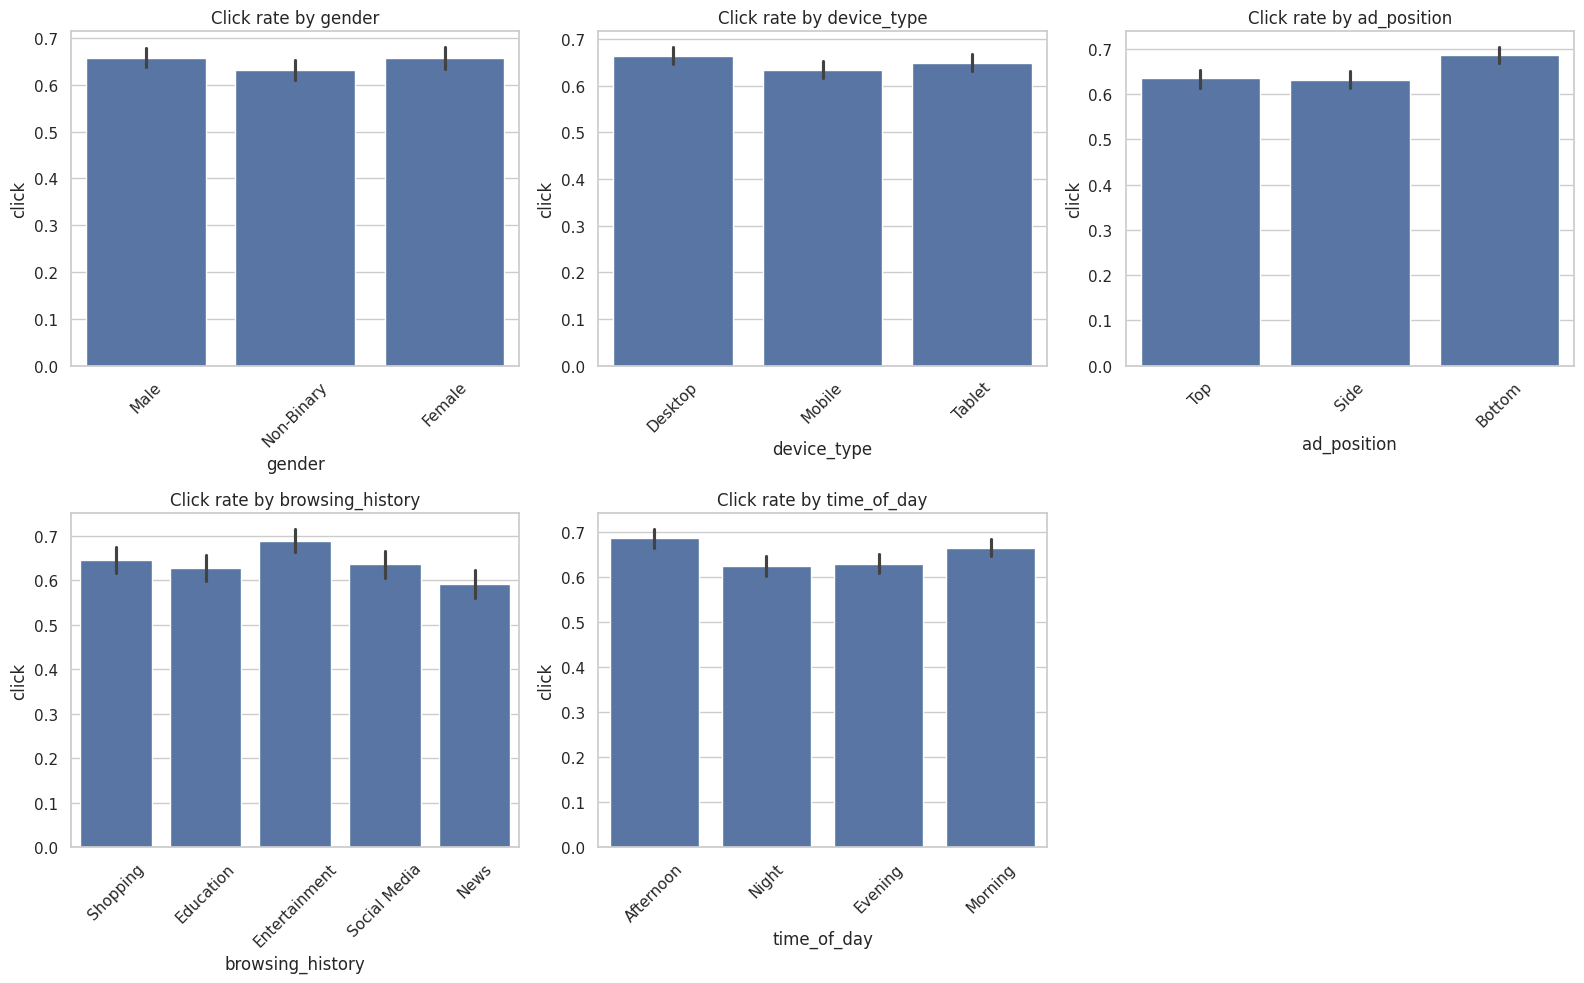

In [10]:
plt.figure(figsize=(16,10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2,3,i)
    sns.barplot(x=col, y='click', data=df)
    plt.xticks(rotation=45)
    plt.title(f"Click rate by {col}")
plt.tight_layout()
plt.show()

In [11]:
# step4: Handle missing values
df['age'] = df['age'].fillna(df['age'].mean())
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [12]:
# step5: Drop unnecessary columns
df.drop(columns=['id', 'full_name'], inplace=True)

In [14]:
# step6: Encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_cols)
df_encoded['age'] = df_encoded['age'].astype('int64')


In [15]:
# step7: Split data
X = df_encoded.drop('click', axis=1)
y = df_encoded['click']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# step8: Train & Evaluate Models

# --- Decision Tree ---
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("\n=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))


=== Decision Tree ===
Accuracy: 0.7285
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.47      0.55       705
           1       0.75      0.87      0.81      1295

    accuracy                           0.73      2000
   macro avg       0.71      0.67      0.68      2000
weighted avg       0.72      0.73      0.72      2000

Confusion Matrix:
 [[ 330  375]
 [ 168 1127]]


In [17]:
# --- Random Forest ---
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, rfc_pred))
print("Classification Report:\n", classification_report(y_test, rfc_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rfc_pred))


=== Random Forest ===
Accuracy: 0.707
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.40      0.49       705
           1       0.73      0.87      0.79      1295

    accuracy                           0.71      2000
   macro avg       0.68      0.64      0.64      2000
weighted avg       0.69      0.71      0.69      2000

Confusion Matrix:
 [[ 283  422]
 [ 164 1131]]


In [18]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("\n=== XGBoost ===")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))


=== XGBoost ===
Accuracy: 0.7465
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.37      0.50       705
           1       0.73      0.95      0.83      1295

    accuracy                           0.75      2000
   macro avg       0.77      0.66      0.67      2000
weighted avg       0.76      0.75      0.72      2000

Confusion Matrix:
 [[ 258  447]
 [  60 1235]]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:32:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


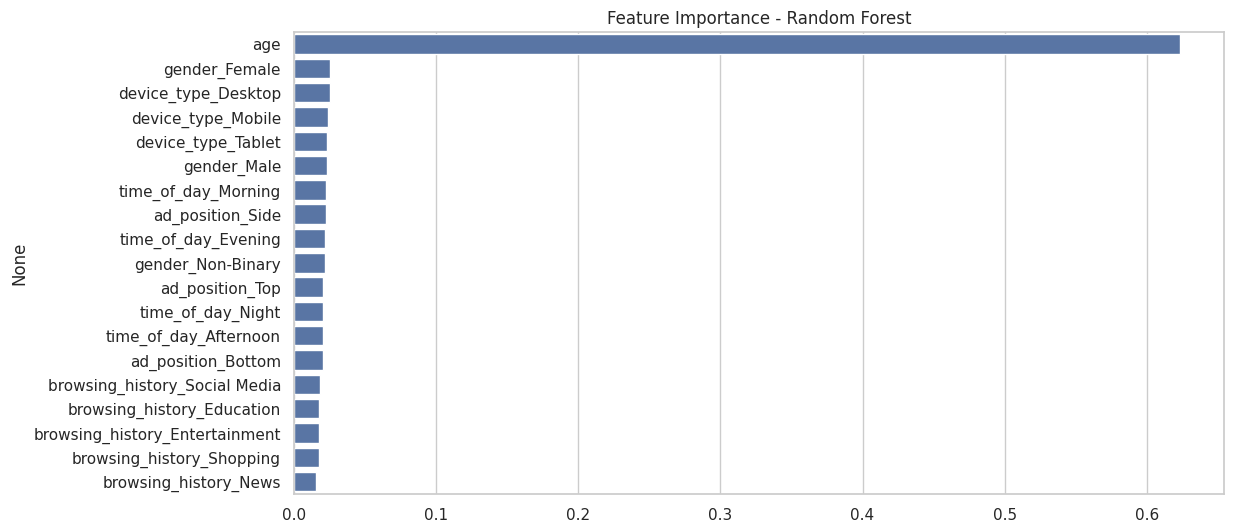

In [19]:
# step9: Optional: Feature Importance from Random Forest
importances = rfc.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance - Random Forest")
plt.show()